## Incomes and revenues


### Techniques for the Analysis of the Territorial Entities' Economic and Financial Management - 2009

The booklet provides socioeconomic, financial and institutional tools to identify the most relevant problems of the Territorial Entity, analyze financial management, address the problems identified and evaluate compliance with current adjustment standards.
 
[Download document]('https://colaboracion.dnp.gov.co/CDT/Desarrollo%20Territorial/104696-Tecnicas-an%C3%A1lisis-Modificado.pdf')

 
### Bases for the management of the Territorial Budget System 2012
The Territorial Development Directorate is pleased to provide you with the document Bases for the management of the Territorial Budget System 2012, which aims to provide the authorities of the territorial entities and readers in general, a reference tool on the budget system at the territorial level. 

The document is made up of fourteen (14) chapters, which address, among other aspects, the following: the conceptual framework and constitutional and legal foundations of the budget system in Colombia, the budget system, the guiding principles of the budget, the budget system of territorial entities, the financial plan, the annual operating investment plan, the revenue and expenditure budget, the process of preparation, approval and liquidation of the budget, and the execution of the budget. It should be noted that the document promotes the articulation between the planning system and the budget system as essential instruments for an efficient and effective management of the territorial entities, which should be reflected in the improvement of the living conditions of the citizens.

[Download document]('https://colaboracion.dnp.gov.co/CDT/Desarrollo%20Territorial/Libro%20Presupuesto%202012.pdf')

**Entity:** Contraloría General de la Nación.

**Description:**  historical information (2012-2021) of the income of the municipalities of the
country.

**Variables** 
1. FUT code - int -
2. Entity name - string - name of the territorial entity
3. DANE department code - int - code that assigns the DANE to each department
4. Name DANE department - string - department name
5. DANE municipality code - int - code that assigns the DANE to each municipality
6. Name DANE municipality - string - name of the municipality
7. Concept Code - string - code that is assigned to each concept
8. Concept - string - name of each income received by the territorial entity
9. Initial Budget - float - initial budget projected by the territorial entity for each concept
10. Final Budget - float - budget at the end of the year
11. Total revenue - float - total revenue collected
12. Has document - string -
13. Document Number - string - law or agreement
14. Percentage destination - float -
15. Destination value - float -

More about Information on revenues of territorial entities 2012 - 2021 (Formato
Unica Territorial - Contaduria Nacional) [here]('https://www.dnp.gov.co/programas/desarrollo-territorial/Estudios-Territoriales/Informacion-Presupuestal').


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

## Data exploration

In [2]:
years_ex = [2013,2014,2015,2016,2017,2018,2019,2020,2021]

df_ex = pd.read_csv('FUT_INGRESOS_2012.csv', sep = ";", encoding = 'utf-8')
df_ex['año'] = 2012

for year in years_ex:
    aux_df_ex =  pd.read_csv('FUT_INGRESOS_'+ str(year) +'.csv', sep = ";", encoding = 'utf-8')
    aux_df_ex['año'] = year
    df_ex = pd.concat([df_ex, aux_df_ex], axis = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_ex.head()

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Presupuesto Inicial,Presupuesto Definitivo,Recaudo,Sin Situación Fondos,Total Ingresos,Tiene Documento,Número Documento,Porción Destinanción,Valor Destinación,año
0,216041660,SALADOBLANCO,41,HUILA,41660.0,SALADOBLANCO,TI.A.1.1,IMPUESTO DE CIRCULACIÓN Y TRÁNSITO SOBRE VEHÍC...,1.000,1.000,2.839,0,2.839,No,NaN,0.0,0,2012
1,214373443,SAN SEBASTIAN DE MARIQUITA,73,TOLIMA,73443.0,SAN SEBASTIÁN DE MARIQUITA,TI.A.1.1,IMPUESTO DE CIRCULACIÓN Y TRÁNSITO SOBRE VEHÍC...,15.000,15.000,25.859,0,25.859,No,NaN,0.0,0,2012
2,217525875,VILLETA,25,CUNDINAMARCA,25875.0,VILLETA,TI.A.1.1,IMPUESTO DE CIRCULACIÓN Y TRÁNSITO SOBRE VEHÍC...,13.813,13.813,10.369,0,10.369,No,NaN,0.0,0,2012
3,210066400,LA VIRGINIA,66,RISARALDA,66400.0,LA VIRGINIA,TI.A.1.1,IMPUESTO DE CIRCULACIÓN Y TRÁNSITO SOBRE VEHÍC...,75.000,75.000,71.094,0,71.094,No,NaN,0.0,0,2012
4,211070110,BUENAVISTA - SUCRE,70,SUCRE,70110.0,BUENAVISTA,TI.A.1.1,IMPUESTO DE CIRCULACIÓN Y TRÁNSITO SOBRE VEHÍC...,1,1,0,0,0,No,NaN,0.0,0,2012


In [5]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313074 entries, 0 to 21870
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Código FUT                1313074 non-null  int64  
 1   Nombre Entidad            1313074 non-null  object 
 2   Cód. DANE Departamento    1313074 non-null  int64  
 3   Nombre DANE Departamento  1313074 non-null  object 
 4   Cód. DANE Municipio       1266840 non-null  float64
 5   Nombre DANE Municipio     1266840 non-null  object 
 6   Código Concepto           1313074 non-null  object 
 7   Concepto                  1313074 non-null  object 
 8   Presupuesto Inicial       1312436 non-null  object 
 9   Presupuesto Definitivo    1312425 non-null  object 
 10  Recaudo                   1312402 non-null  object 
 11  Sin Situación Fondos      1312423 non-null  object 
 12  Total Ingresos            1312402 non-null  object 
 13  Tiene Documento           131

This dataset contains 17 fields, that include historical information (2012-2021) of the income of the country's municipalities. Each row contains the budget and the incomes of the municipality, associated with its source(taxes, contributions and fees).

In [6]:
df_ex['Nombre DANE Municipio'].value_counts()

LA UNIÓN                    5093
VILLANUEVA                  4606
BUENAVISTA                  4423
GRANADA                     4080
GUADALUPE                   3761
                            ... 
SAN JOSÉ DE CÚCUTA           131
CHÁMEZA                      118
EL PAUJÍL                    101
SAN JOSÉ DE TOLUVIEJO         91
MANAURE BALCÓN DEL CESAR      76
Name: Nombre DANE Municipio, Length: 1031, dtype: int64

In [7]:
not_incomes = df_ex.loc[(df_ex['Total Ingresos'].isnull()) & ((df_ex['Nombre DANE Municipio'].notnull()))]['Nombre DANE Municipio'].unique()
print(not_incomes)
print(len(not_incomes))

['VILLAVIEJA' 'UMBITA' 'CIUDAD BOLÍVAR' 'BARAYA' 'LA CUMBRE' 'SUESCA'
 'LORICA' 'GIRÓN' 'SANTA BÁRBARA' 'PALERMO' 'ARGELIA' 'SAN MARCOS'
 'SANTIAGO' 'PISBA' 'SANTA ROSA DE VITERBO' 'EL PIÑON' 'LA SIERRA'
 'MAICAO' 'ATRATO' 'BERBEO' 'OBANDO' 'PUERTO RICO' 'SALAMINA' 'NORCASIA'
 'ANDES' 'GÃœICÁN' 'CAÑASGORDAS' 'CUCAITA' 'EL COLEGIO' 'TARAIRA' 'COELLO'
 'MARINILLA' 'SIMIJACA' 'BARICHARA' 'DONMATÍAS' 'GAMARRA' 'DABEIBA'
 'ARBOLETES' 'MONTEBELLO' 'SANTANA' 'ANSERMANUEVO' 'CHOACHÍ'
 'SAN MARTÍN DE LOBA' 'EL TARRA' 'SIBATÉ' 'EL BAGRE' 'BELTRÁN'
 'VILLAMARÍA' 'PAMPLONA' 'TOPAIPÍ' 'VILLA RICA' 'FORTUL' 'CONCORDIA'
 'MARSELLA' 'RESTREPO' 'EL LITORAL DEL SAN JUAN' 'MELGAR' 'BOJAYA'
 'CUMARIBO' 'MAGANGUÉ' 'UNE' 'RISARALDA' 'ALGARROBO' 'ALTAMIRA'
 'LOS CÓRDOBAS' 'PUERTO TEJADA' 'SUPATÁ' 'ABRIAQUÍ' 'MACEO' 'LA PAZ'
 'FUNES' 'ELÍAS' 'NARIÑO' 'SANTA HELENA DEL OPÓN' 'RECETOR' 'LEBRIJA'
 'MONGUA' 'BELMIRA' 'TÁMARA' 'MUTATÁ' 'VILLANUEVA'
 'SAN JOSÉ DE LA MONTAÑA' 'SOLITA' 'FACATATIVÁ' 'SANTA ROSA' 'MONT


There is a total of 1.019 municipalities, and 205 of them contain records without associated incomes. Initially this does not represent a problem since there may be taxes, fees and contributions for which a collection was not generated. However, in order to be able to add the income of each municipality, these fields must be replaced by zero

In [8]:
df_ex.loc[(df_ex['Nombre DANE Departamento'].isnull()) & ((df_ex['Nombre DANE Municipio'].notnull()))]

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Presupuesto Inicial,Presupuesto Definitivo,Recaudo,Sin Situación Fondos,Total Ingresos,Tiene Documento,Número Documento,Porción Destinanción,Valor Destinación,año


In [9]:
departments = df_ex['Nombre DANE Departamento'].unique()
print(departments)
print(len(departments))

['HUILA' 'TOLIMA' 'CUNDINAMARCA' 'RISARALDA' 'SUCRE' 'BOYACÁ' 'CAQUETÁ'
 'VALLE DEL CAUCA' 'CESAR' 'VICHADA' 'ANTIOQUIA' 'NARIÑO'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'CÓRDOBA'
 'CAUCA' 'BOLÍVAR' 'CALDAS' 'LA GUAJIRA' 'NORTE DE SANTANDER' 'SANTANDER'
 'QUINDIO' 'MAGDALENA' 'CASANARE' 'ARAUCA' 'ATLÁNTICO' 'CHOCÓ' 'GUAVIARE'
 'META' 'PUTUMAYO' 'GUAINÍA' 'AMAZONAS' 'VAUPÉS' 'BOGOTÁ, D.C.'
 'BOGOTÁ. D.C.' 'QUINDÍO']
35



Additionally, all municipalities have an associated department, which facilitates their classification. An important point is that the dataset contains a total of 35 departments and Colombia has just 32. There is due to it includes 'BOGOTÁ, D.C.' as a department and the names of some municipalities were written in different ways. For this reason it is necessary to homologate the names.

In [10]:
df_ex['Nombre DANE Departamento'] = df_ex['Nombre DANE Departamento'].replace({'QUINDÍO':'QUINDIO','BOGOTÁ, D.C.':'BOGOTÁ. D.C.'})
df_ex['Nombre DANE Departamento'].unique()

array(['HUILA', 'TOLIMA', 'CUNDINAMARCA', 'RISARALDA', 'SUCRE', 'BOYACÁ',
       'CAQUETÁ', 'VALLE DEL CAUCA', 'CESAR', 'VICHADA', 'ANTIOQUIA',
       'NARIÑO',
       'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA',
       'CÓRDOBA', 'CAUCA', 'BOLÍVAR', 'CALDAS', 'LA GUAJIRA',
       'NORTE DE SANTANDER', 'SANTANDER', 'QUINDIO', 'MAGDALENA',
       'CASANARE', 'ARAUCA', 'ATLÁNTICO', 'CHOCÓ', 'GUAVIARE', 'META',
       'PUTUMAYO', 'GUAINÍA', 'AMAZONAS', 'VAUPÉS', 'BOGOTÁ. D.C.'],
      dtype=object)

In [11]:
df_ex.loc[df_ex['Nombre DANE Municipio'] == 'COLOMBIA'].head(3)

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Presupuesto Inicial,Presupuesto Definitivo,Recaudo,Sin Situación Fondos,Total Ingresos,Tiene Documento,Número Documento,Porción Destinanción,Valor Destinación,año
326,210641206,COLOMBIA,41,HUILA,41206.0,COLOMBIA,TI.A.1.10,IMPUESTO DE ESPECTÁCULOS PÚBLICOS MUNICIPAL,200,0,0,0,0,No,NaN,0.0,0,2012
558,210641206,COLOMBIA,41,HUILA,41206.0,COLOMBIA,TI.A.1.2,VEHÍCULOS AUTOMOTORES,3.500,750,724,0,724,No,NaN,0.0,0,2012
647,210641206,COLOMBIA,41,HUILA,41206.0,COLOMBIA,TI.A.1.2.1,VEHÍCULOS AUTOMOTORES VIGENCIA ACTUAL,3.000,750,724,0,724,No,NaN,0.0,0,2012


Other important aspect to keep in mind is that some rows has the municipality of "Colombia". This could be understood as an error, however, there is a municipality with this name located in the department of Huila.

## Data cleaning

Due to the fact that the incomes until the year 2016 are in miles of pesos and from 2017 in pesos, it is necessary to homologate the values. Additionaly, we can observe that some numerical fields are separated by characters like point, spaces, etc., and it is necessary replace them. Also, for the dataset of the year 2021, point represents the decimal separator and require and individual cleaning.

#### years before 2021

In [12]:
years = [2013,2014,2015,2016,2017,2018,2019,2020]

df = pd.read_csv('FUT_INGRESOS_2012.csv', sep = ";", encoding = 'utf-8', dtype={'Nombre DANE Municipio': str,
                                                                                'Código Concepto': str, 'Concepto':str})
df['año'] = 2012

for year in years:
    aux_df =  pd.read_csv('FUT_INGRESOS_'+ str(year) +'.csv', sep = ";", encoding = 'utf-8', dtype={'Nombre DANE Municipio': str,
                                                                                'Código Concepto': str, 'Concepto':str})
    aux_df['año'] = year
    df = pd.concat([df, aux_df], axis = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
#replace special characters
df[['Total Ingresos','Valor Destinación']] = df[['Total Ingresos','Valor Destinación']].replace(r'\.','', regex=True)
df[['Total Ingresos','Valor Destinación']] = df[['Total Ingresos','Valor Destinación']].fillna(0)
df[['Total Ingresos','Valor Destinación']] = df[['Total Ingresos','Valor Destinación']].replace('  ',0)
df[['Total Ingresos','Valor Destinación']] = df[['Total Ingresos','Valor Destinación']].astype('int64')

In [15]:
bd = df.copy()

#### year 2021

In [16]:
df_2021 = pd.read_csv('FUT_INGRESOS_2021.csv', sep = ";", encoding = 'utf-8', dtype={'Nombre DANE Municipio': str,
                                                                                'Código Concepto': str, 'Concepto':str})
df_2021['año'] = 2021

In [17]:
df_2021[['Total Ingresos','Valor Destinación']] = df_2021[['Total Ingresos','Valor Destinación']].replace(r'[\.]\d+', '', regex=True)
df_2021[['Total Ingresos','Valor Destinación']] = df_2021[['Total Ingresos','Valor Destinación']].fillna(0)
df_2021[['Total Ingresos','Valor Destinación']] = df_2021[['Total Ingresos','Valor Destinación']].replace('  ',0)
df_2021[['Total Ingresos','Valor Destinación']] = df_2021[['Total Ingresos','Valor Destinación']].astype('int64')

In [18]:
#concatenate the dataframes
bd_2 = pd.concat([bd,df_2021], ignore_index=True)

In [19]:
bd_2['Código Concepto'] = bd_2['Código Concepto'].str.strip()

We can see again that as happens with the name of the departments, Bogotá is written in different ways, so it must be homologated. Additionally, it is neccesary to remove some spaces.

In [21]:
bd_2['Nombre DANE Municipio'] = bd_2['Nombre DANE Municipio'].replace('BOGOTÁ. D.C.','BOGOTÁ, D.C.')

In [22]:
bd_2['Concepto'] = bd_2['Concepto'].str.strip()

## Revenues Analysis

There are rows that contain the sum of the total income for each municipality. Initially, these values ​​will be taken for the EDA.

In [24]:
total_incomes = bd_2.loc[(bd_2['Código Concepto'] == 'TI') | (bd_2['Código Concepto'] == 'INGRESOS TOTALES')]
total_incomes.head()

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Presupuesto Inicial,Presupuesto Definitivo,Recaudo,Sin Situación Fondos,Total Ingresos,Tiene Documento,Número Documento,Porción Destinanción,Valor Destinación,año
33568,216705467,MONTEBELLO,5,ANTIOQUIA,5467.0,MONTEBELLO,TI,INGRESOS TOTALES,4.439.215,9.383.805,6.883.019,446.513,7329532,No,NaN,0.0,0,2012
33569,215005150,CAROLINA DEL PRINCIPE,5,ANTIOQUIA,5150.0,CAROLINA,TI,INGRESOS TOTALES,5.591.000,7.174.847,5.548.813,914.871,6463684,No,NaN,0.0,0,2012
33570,219927099,BOJAYÁ (BELLAVISTA),27,CHOCÓ,27099.0,BOJAYA,TI,INGRESOS TOTALES,8.321.914,12.188.279,6.163.935,4.655.211,10819146,No,NaN,0.0,0,2012
33577,218054480,MUTISCUA,54,NORTE DE SANTANDER,54480.0,MUTISCUA,TI,INGRESOS TOTALES,2.811.917,5.730.657,4.407.332,1.152.928,5560260,No,NaN,0.0,0,2012
33578,216873168,CHAPARRAL,73,TOLIMA,73168.0,CHAPARRAL,TI,INGRESOS TOTALES,19.203.934,38.375.878,35.599.229,0,35599229,No,NaN,0.0,0,2012


In [26]:
revenues_by_mun = total_incomes.groupby(['Cód. DANE Municipio','Nombre DANE Municipio'])[['Total Ingresos']].sum().reset_index()
revenues_by_mun = revenues_by_mun.sort_values(by='Total Ingresos', ascending=False)

In [27]:
revenues_by_mun.head(10)

,Cód. DANE Municipio,Nombre DANE Municipio,Total Ingresos
150,11001.0,"BOGOTÁ, D.C.",98156015044114
0,5001.0,MEDELLÍN,32688765064314
1014,76001.0,CALI,19210481978550
127,8001.0,BARRANQUILLA,17602644001930
151,13001.0,CARTAGENA,7861197116587
853,68001.0,BUCARAMANGA,5007733309498
662,47001.0,SANTA MARTA,4776394698398
434,23001.0,MONTERÍA,4663583093757
839,66001.0,PEREIRA,4625729084536
786,54001.0,CÚCUTA,4518393337509


<Figure size 2880x1440 with 0 Axes>

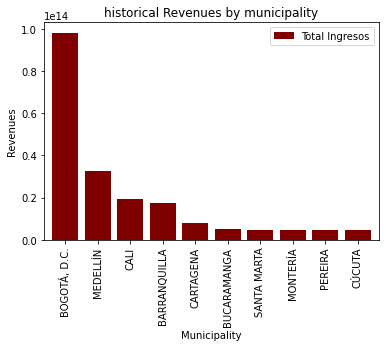

In [28]:
top_revenues = revenues_by_mun.head(10)
plt.figure(figsize=(40, 20))
top_revenues.plot(title="historical Revenues by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

We can observe that the first municipalities with the highest historical revenues are Bogotá, Medellín, Cali, Barranquilla and Cartagena. Now, explore about the anual behavior for this municipalities.

In [29]:
revenues_by_year = total_incomes.groupby(['Nombre DANE Municipio','año'])[['Total Ingresos']].sum().reset_index()
revenues_by_year = revenues_by_year.sort_values(by='Total Ingresos', ascending=False)

In [30]:
top_five = ['BOGOTÁ, D.C.', 'MEDELLÍN','CALI','BARRANQUILLA','CARTAGENA']
historical_revenues = revenues_by_year.loc[revenues_by_year['Nombre DANE Municipio'].isin(top_five)]

Historical behaviour of revenues in top municipalities

In [31]:
revenues_2021 = historical_revenues.loc[historical_revenues['año'] == 2021].sort_values(by='Total Ingresos', ascending=False)
revenues_2020 = historical_revenues.loc[historical_revenues['año'] == 2020].sort_values(by='Total Ingresos', ascending=False)
revenues_2019 = historical_revenues.loc[historical_revenues['año'] == 2019].sort_values(by='Total Ingresos', ascending=False)
revenues_2018 = historical_revenues.loc[historical_revenues['año'] == 2018].sort_values(by='Total Ingresos', ascending=False)

<Figure size 2880x1440 with 0 Axes>

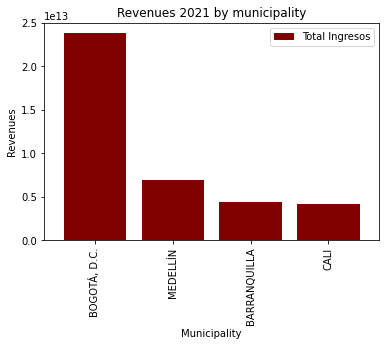

In [33]:
plt.figure(figsize=(40, 20))
revenues_2021.plot(title="Revenues 2021 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

<Figure size 2880x1440 with 0 Axes>

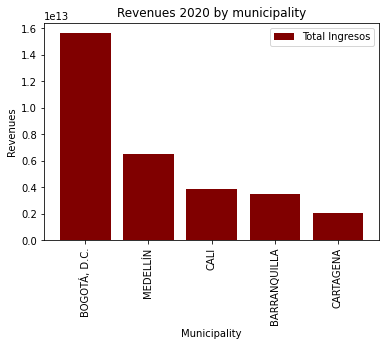

In [34]:
plt.figure(figsize=(40, 20))
revenues_2020.plot(title="Revenues 2020 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

<Figure size 2880x1440 with 0 Axes>

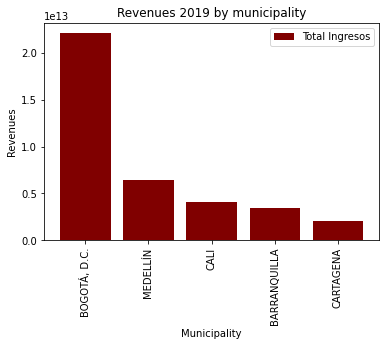

In [35]:
plt.figure(figsize=(40, 20))
revenues_2019.plot(title="Revenues 2019 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

<Figure size 2880x1440 with 0 Axes>

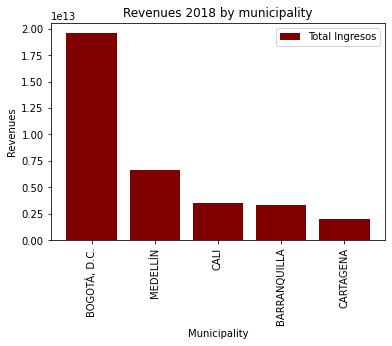

In [36]:
plt.figure(figsize=(40, 20))
revenues_2018.plot(title="Revenues 2018 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

## Feature engineering

#### Overview

For purposes of the analysis of fiscal performance, Law 617 of 2000 states that the current income of free destination for each municipality must be taken into account. Therefore, we only need these two fields in our final dataset, in addition to those that can identify each municipality and relate it to the expenditure dataset.

On the other hand, unrestricted current income is obtained after subtracting specific destination income from current income.

In this sense, proceed as follows:

- Find the total income with a specific destination by municipality.
- Find the total current income by municipality.
- Subtract both values to find the total current income of free destination (ICLD)

In [37]:
bd_2.isnull().sum()

Código FUT                        0
Nombre Entidad                    0
Cód. DANE Departamento            0
Nombre DANE Departamento          0
Cód. DANE Municipio           46234
Nombre DANE Municipio         46234
Código Concepto                   0
Concepto                          0
Presupuesto Inicial             638
Presupuesto Definitivo          649
Recaudo                         672
Sin Situación Fondos            651
Total Ingresos                    0
Tiene Documento                   0
Número Documento            1259088
Porción Destinanción          22146
Valor Destinación                 0
año                               0
dtype: int64

In [ ]:
bd_final = bd_2.dropna(subset=['Nombre DANE Municipio'])
bd_final['Código Concepto'] = bd_final['Código Concepto'].astype(str)
bd_final['Código Concepto'] = bd_final['Código Concepto'].str.strip()
bd_final['año'] = bd_final['año'].astype(str)
bd_final['Cód. DANE Municipio'] = bd_final['Cód. DANE Municipio'].astype(str)

#specific destination dataframe
specific_destination = bd_final.groupby(['Cód. DANE Municipio','año'])[['Valor Destinación']].sum().reset_index()
specific_destination['key'] = specific_destination['Cód. DANE Municipio'] + '_' + specific_destination['año']
specific_destination = specific_destination[['key','Valor Destinación']]

#current incomes dataframe
current_incomes = bd_final.loc[bd_final['Código Concepto'] == 'TI.A']
current_incomes = current_incomes[['Cód. DANE Departamento','Nombre DANE Departamento','Cód. DANE Municipio','Nombre DANE Municipio',
                                   'Concepto','Total Ingresos','año']]

current_incomes['key'] = current_incomes['Cód. DANE Municipio'] + '_' + current_incomes['año']

#merge of incomes
df_final = pd.merge(current_incomes, specific_destination, how='left', on='key', validate='one_to_one' )
df_final['ICLD'] = df_final['Total Ingresos'] - df_final['Valor Destinación']

In [40]:
final_grouped = df_final.groupby(['Cód. DANE Municipio','Nombre DANE Municipio','año'])['ICLD'].sum().reset_index().sort_values(by='ICLD', ascending=False)
final_neg = final_grouped.loc[final_grouped['ICLD'] < 0]

In [41]:
final_grouped

,Cód. DANE Municipio,Nombre DANE Municipio,año,ICLD
9,11001.0,"BOGOTÁ, D.C.",2021,16424765848955
7,11001.0,"BOGOTÁ, D.C.",2019,15141465281916
6,11001.0,"BOGOTÁ, D.C.",2018,13689528443613
5,11001.0,"BOGOTÁ, D.C.",2017,12830342370644
8,11001.0,"BOGOTÁ, D.C.",2020,11185069565503
...,...,...,...,...
6346,54001.0,CÚCUTA,2020,-762990506854
2286,19824.0,TOTORÓ,2012,-1307625715499
6343,54001.0,CÚCUTA,2017,-69284657418710
6344,54001.0,CÚCUTA,2018,-71023712887894


In [42]:
len(final_neg['Nombre DANE Municipio'].unique())

68

In [43]:
final_neg['Nombre DANE Municipio'].unique()

array(['TIQUISIO', 'ANCUYÁ', 'JUNÍN', 'LA LLANADA', 'EL ROSARIO', 'COLÓN',
       'SAN JOSÉ DEL PALMAR', 'PIAMONTE', 'RIOBLANCO', 'PIEDRAS',
       'OLAYA HERRERA', 'MALLAMA', 'EL TABLÓN DE GÓMEZ', 'SAN BERNARDO',
       'ROSAS', 'CONSACA', 'PUERTO GUZMÁN', 'TOTORÓ', 'LA PAZ',
       'EL PEÑOL', 'PURÍSIMA', 'CALDAS', 'MOSQUERA',
       'SAN ANDRÉS DE CUERQUÍA', 'CÁCERES', 'PAMPLONITA', 'SILVIA',
       'CAICEDO', 'BELÉN', 'BALBOA', 'TITIRIBÍ', 'REGIDOR', 'EL PEÑÓN',
       'UBAQUE', 'SANTA ROSA', 'TAURAMENA', 'LÓPEZ', 'PIENDAMÓ', 'ORTEGA',
       'BUENAVISTA', 'PUERTO LLERAS', 'AGUSTÍN CODAZZI', 'BARBACOAS',
       'TIMBIQUÍ', 'GUAPI', 'LOURDES', 'GRAMALOTE', 'LA UNIÓN',
       'SAN PEDRO DE URABA', 'PINILLOS', 'LA VEGA', 'PACHO', 'ARAUCA',
       'SAN MIGUEL', 'CHITAGÁ', 'MARQUETALIA', 'CUNDAY', 'GRANADA',
       'LA ESPERANZA', 'GINEBRA', 'PEREIRA', 'MONTECRISTO', 'ALMAGUER',
       'SAN DIEGO', 'MOMIL', 'LA FLORIDA', 'LOS ANDES', 'CÚCUTA'],
      dtype=object)

#### values validation and graphs

When performing the analysis, it was identified that for certain municipalities there are typing errors and therefore the values ​​are out of the standard (reports in thousands until 2016 and in pesos from 2017 onwards).
Therefore, the municipalities identified in the top five are taken as a reference value. In other words, those municipalities that have incomes higher than those belonging to the top five must be analyzed independently.

In [48]:
a = [2021]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

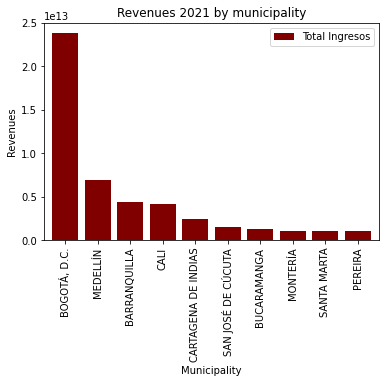

In [49]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2021 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

In [50]:
a = [2020]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

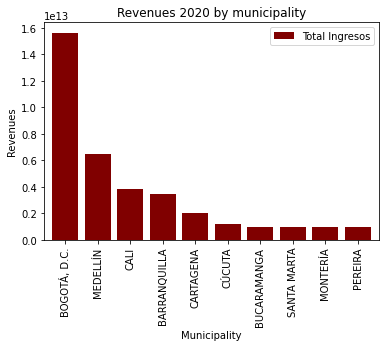

In [51]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2020 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

In [52]:
a = [2019]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

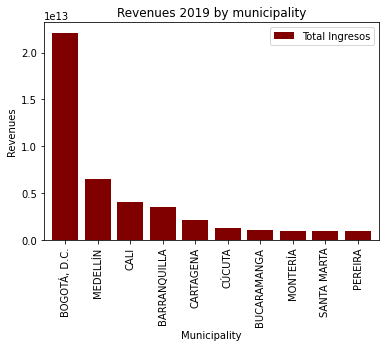

In [53]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2019 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

In [54]:
a = [2018]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

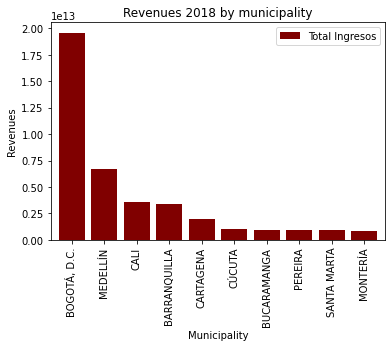

In [55]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2018 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

In [56]:
a = [2017]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

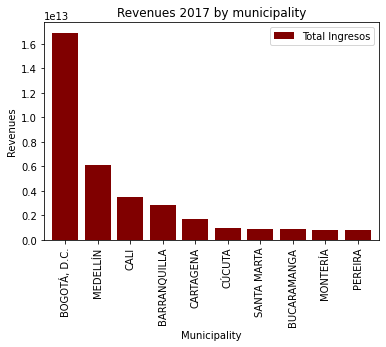

In [57]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2017 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

In [58]:
a = [2016]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

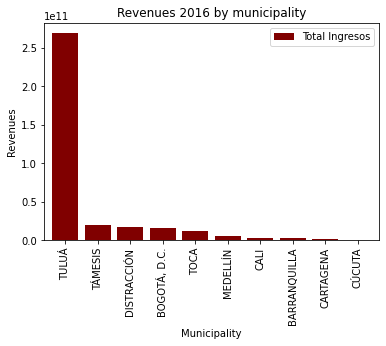

In [59]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2016 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

In [60]:
a = [2015]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

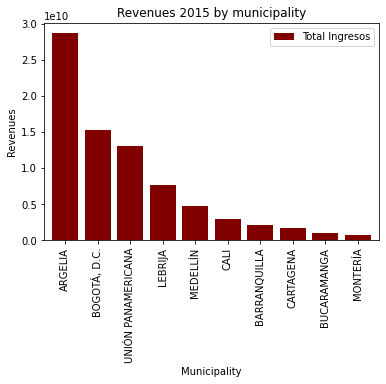

In [61]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2015 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

In [62]:
a = [2014]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

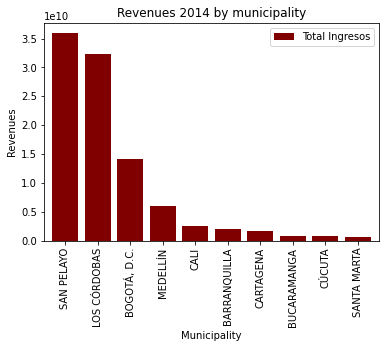

In [63]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2014 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

In [64]:
a = [2013]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

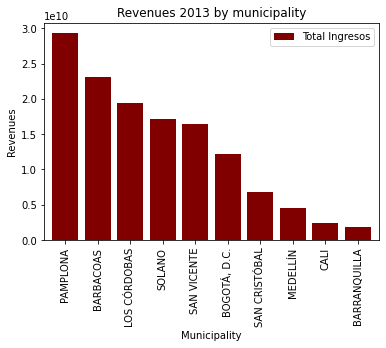

In [65]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2013 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

In [66]:
a = [2012]
revenues_by_year['año'] = revenues_by_year['año'].astype('int64')
b = revenues_by_year.loc[revenues_by_year['año'].isin(a)].sort_values(by='Total Ingresos', ascending=False)
b['Nombre DANE Municipio'] = b['Nombre DANE Municipio'].str.strip()

<Figure size 2880x1440 with 0 Axes>

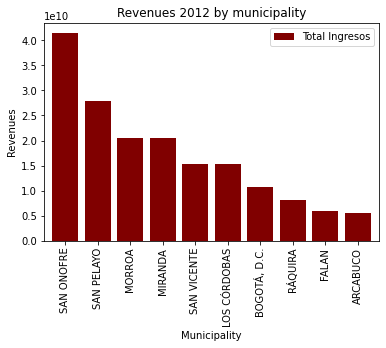

In [67]:
plt.figure(figsize=(40, 20))
b.head(10).plot(title="Revenues 2012 by municipality",
                  x='Nombre DANE Municipio',
                  y='Total Ingresos',
                  xlabel='Municipality', 
                  ylabel='Revenues', 
                  kind='bar',color ='maroon',
                  width = 0.8)

#### Final revision

Once the trends have been identified, we proceed to translate the values between 2012 and 2016 into pesos.

In [ ]:
first_years = ['2012','2013','2014','2015','2016']
second_years = ['2017','2018','2019','2020','2021']
df_1 = df_final.loc[df_final['año'].isin(first_years)]
df_2 = df_final.loc[df_final['año'].isin(second_years)]

df_1[['Total Ingresos','Valor Destinación','ICLD']] = df_1[['Total Ingresos','Valor Destinación','ICLD']] * 1000 #homologate the values (all in pesos)
bd_hom = pd.concat([df_1,df_2], ignore_index=True)

bd_hom = bd_hom.sort_values(by=['Total Ingresos'], ascending=False)

##### 2012

In [70]:
year_to_graph = ['2012']
bd_hom_2012 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)

In [71]:
px.bar(bd_hom_2012.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

In [72]:
mun_2012 = ['SAN ONOFRE', 'SAN PELAYO', 'MIRANDA', 'MORROA', 'LOS CÓRDOBAS', 'SAN VICENTE', 'RÁQUIRA', 'FALAN', 'ARCABUCO']

bd_hom['Total Ingresos'] = np.where((bd_hom['Nombre DANE Municipio'].isin(mun_2012)) & (bd_hom['año'] == '2012'), bd_hom['Total Ingresos'] / 1000, bd_hom['Total Ingresos'])

In [73]:
year_to_graph = ['2012']
bd_hom_2012 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2012.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

##### 2013

In [74]:
year_to_graph = ['2013']
bd_hom_2013 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2013.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

In [75]:
mun_2013 = ['BARBACOAS', 'PAMPLONA', 'LOS CÓRDOBAS', 'SOLANO', 'SAN VICENTE', 'SAN CRISTÓBAL']

bd_hom['Total Ingresos'] = np.where((bd_hom['Nombre DANE Municipio'].isin(mun_2013)) & (bd_hom['año'] == '2013'), bd_hom['Total Ingresos'] / 1000, bd_hom['Total Ingresos'])

In [76]:
year_to_graph = ['2013']
bd_hom_2013 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2013.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

##### 2014

In [77]:
year_to_graph = ['2014']
bd_hom_2014 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2014.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

In [78]:
mun_2014 = ['SAN PELAYO', 'LOS CÓRDOBAS']

bd_hom['Total Ingresos'] = np.where((bd_hom['Nombre DANE Municipio'].isin(mun_2014)) & (bd_hom['año'] == '2014'), bd_hom['Total Ingresos'] / 1000, bd_hom['Total Ingresos'])

##### 2015

In [79]:
year_to_graph = ['2015']
bd_hom_2015 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2015.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

In [80]:
mun_2015 = ['ARGELIA', 'UNIÓN PANAMERICANA', 'LEBRIJA']

bd_hom['Total Ingresos'] = np.where((bd_hom['Nombre DANE Municipio'].isin(mun_2015)) & (bd_hom['año'] == '2015'), bd_hom['Total Ingresos'] / 1000, bd_hom['Total Ingresos'])

##### 2016

In [81]:
year_to_graph = ['2016']
bd_hom_2016 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2016.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

In [82]:
mun_2016 = ['TULUÁ', 'TÁMESIS', 'TOCA', 'DISTRACCIÓN', 'USIACURÍ']

bd_hom['Total Ingresos'] = np.where((bd_hom['Nombre DANE Municipio'].isin(mun_2016)) & (bd_hom['año'] == '2016'), bd_hom['Total Ingresos'] / 1000, bd_hom['Total Ingresos'])

In [83]:
year_to_graph = ['2016']
bd_hom_2016 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2016.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

##### 2017

In [84]:
year_to_graph = ['2017']
bd_hom_2017 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2017.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

##### 2018

In [85]:
year_to_graph = ['2018']
bd_hom_2018 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2018.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

##### 2019

In [86]:
year_to_graph = ['2019']
bd_hom_2019 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2019.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

##### 2020

In [87]:
year_to_graph = ['2020']
bd_hom_2020 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2020.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

##### 2021

In [88]:
year_to_graph = ['2021']
bd_hom_2021 = bd_hom.loc[bd_hom['año'].isin(year_to_graph)].sort_values(by='Total Ingresos', ascending=False)
px.bar(bd_hom_2021.head(20),x='Nombre DANE Municipio',y='Total Ingresos')

In [89]:
bd_hom = bd_hom.sort_values(by=['año','Total Ingresos'], ascending=False)

In [ ]:
bd_hom.head()

,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Concepto,Total Ingresos,año,key,Valor Destinación,ICLD
9880,11,BOGOTÁ. D.C.,11001.0,"BOGOTÁ, D.C.",INGRESOS CORRIENTES,1.646537e+13,2021,11001.0_2021,40607493000,16424765848955
9878,5,ANTIOQUIA,5001.0,MEDELLÍN,INGRESOS CORRIENTES,4.376628e+12,2021,5001.0_2021,223005306523,4153622886401
9900,76,VALLE DEL CAUCA,76001.0,CALI,INGRESOS CORRIENTES,3.536668e+12,2021,76001.0_2021,0,3536668242627
9879,8,ATLÁNTICO,8001.0,BARRANQUILLA,INGRESOS CORRIENTES,2.990201e+12,2021,8001.0_2021,8688688,2990191875039
9881,13,BOLÍVAR,13001.0,CARTAGENA DE INDIAS,INGRESOS CORRIENTES,2.172797e+12,2021,13001.0_2021,100,2172796935211


### Revision ICLD

In [90]:
icld_negatives = bd_hom.loc[bd_hom['ICLD'] < 0]

In [91]:
icld_negatives['Nombre DANE Municipio'].unique()

array(['PEREIRA', 'CÚCUTA', 'PINILLOS', 'RIOBLANCO', 'TIQUISIO',
       'ALMAGUER', 'PURÍSIMA', 'SAN DIEGO', 'MONTECRISTO',
       'AGUSTÍN CODAZZI', 'LA UNIÓN', 'LOS ANDES', 'BELÉN', 'COLÓN',
       'PUERTO GUZMÁN', 'TOTORÓ', 'GINEBRA', 'LA LLANADA', 'MOMIL',
       'CONSACA', 'EL PEÑÓN', 'LA FLORIDA', 'ANCUYÁ', 'EL PEÑOL',
       'REGIDOR', 'CÁCERES', 'MOSQUERA', 'JUNÍN', 'CAICEDO',
       'SAN ANDRÉS DE CUERQUÍA', 'TITIRIBÍ', 'SANTA ROSA', 'GRANADA',
       'SAN PEDRO DE URABA', 'LA PAZ', 'BARBACOAS', 'EL TABLÓN DE GÓMEZ',
       'EL ROSARIO', 'MALLAMA', 'TAURAMENA', 'LA VEGA', 'TIMBIQUÍ',
       'OLAYA HERRERA', 'SAN MIGUEL', 'LÓPEZ', 'PIAMONTE', 'SAN BERNARDO',
       'PIEDRAS', 'SILVIA', 'CALDAS', 'PIENDAMÓ', 'BUENAVISTA', 'PACHO',
       'CHITAGÁ', 'CUNDAY', 'UBAQUE', 'ROSAS', 'SAN JOSÉ DEL PALMAR',
       'PAMPLONITA', 'GRAMALOTE', 'ARAUCA', 'ORTEGA', 'GUAPI',
       'PUERTO LLERAS', 'BALBOA', 'LA ESPERANZA', 'MARQUETALIA',
       'LOURDES'], dtype=object)

In [92]:
bd_hom_2 = bd_hom.copy()
bd_hom_2 = bd_hom_2.sort_values(by=['año','ICLD'], ascending=True)

In [93]:
#modificar key para cruzar con categories
bd_hom_2['ICLD'] = bd_hom_2['Total Ingresos'] - bd_hom_2['Valor Destinación']
bd_hom_2['key'] = bd_hom_2['key'].replace(r'\.0', '' , regex= True)

In [95]:
#load categories
df_cat = pd.read_csv('categories.csv', sep = ",", encoding = 'utf-8')

In [96]:
#merge categories and incomes
df_cat = df_cat[['key', 'categoria']]
df_merged = pd.merge(bd_hom_2, df_cat, how='left', on= 'key')

In [97]:
#dividir el dataframe en ICLD positivos y negativos
df_merged_neg =  df_merged[df_merged['ICLD'] < 0]
df_merged_pos =  df_merged[df_merged['ICLD'] > 0]

In [ ]:
#hallar la media de destinación específica por categoría partiendo de los datos positivos
df_merged_pos2 = df_merged_pos.groupby(['año','categoria'])[['Valor Destinación']]. mean().reset_index()

#crear una key en el dataframe con los valores negativos y el dataframe con la media de los valores
df_merged_neg['año']= df_merged_neg['año'].astype(str)
df_merged_neg['categoria'] = df_merged_neg['categoria'].astype(str)
df_merged_neg['keycategory'] = df_merged_neg['año'] + '_' + df_merged_neg['categoria']

df_merged_pos2['año']= df_merged_pos2['año'].astype(str)
df_merged_pos2['categoria'] = df_merged_pos2['categoria'].astype(str)
df_merged_pos2['keycategory'] = df_merged_pos2['año'] + '_' + df_merged_pos2['categoria']

df_merged_pos2 =df_merged_pos2[['Valor Destinación', 'keycategory']]

#Se crea el nuevo dataframe
df_merged_new = pd.merge(df_merged_neg, df_merged_pos2, how='left', on= 'keycategory')

In [99]:
#limpiar el nuevo df y calcular el valor de los ICLD
df_merged_new['ICLD2'] = df_merged_new['Total Ingresos'] - df_merged_new['Valor Destinación_y']
df_merged_new = df_merged_new.drop(['Valor Destinación_x', 'ICLD', 'keycategory'], axis= 1)
df_merged_new.rename(columns = {'Valor Destinación_y':'Valor Destinación', 'ICLD2' : 'ICLD'}, inplace= True)

bd_final = pd.concat([df_merged_pos, df_merged_new], ignore_index= True)

In [102]:
bd_final = bd_final.groupby(['Nombre DANE Departamento','Cód. DANE Municipio','Nombre DANE Municipio','año','key'])[['ICLD']].sum().reset_index()

In [103]:
bd_final

,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,año,key,ICLD
0,AMAZONAS,91001.0,LETICIA,2012,91001_2012,2.494108e+10
1,AMAZONAS,91001.0,LETICIA,2013,91001_2013,2.778932e+10
2,AMAZONAS,91001.0,LETICIA,2014,91001_2014,2.943518e+10
3,AMAZONAS,91001.0,LETICIA,2015,91001_2015,3.866723e+10
4,AMAZONAS,91001.0,LETICIA,2016,91001_2016,3.637953e+10
...,...,...,...,...,...,...
10030,VICHADA,99773.0,CUMARIBO,2015,99773_2015,3.739760e+10
10031,VICHADA,99773.0,CUMARIBO,2016,99773_2016,4.136810e+10
10032,VICHADA,99773.0,CUMARIBO,2017,99773_2017,4.961960e+10
10033,VICHADA,99773.0,CUMARIBO,2019,99773_2019,5.906641e+10


In [104]:
bd_final['ICLD'] = bd_final['ICLD'].astype('int64')

In [ ]:
bd_final.to_csv('incomes.csv', index=False, encoding='utf-8')